<img src='https://www.anadronestarting.com/wp-content/uploads/intel-main_opt.png' width=50%>

# Lecture002 - 이미지 분류 & 모델 트레이닝
<font size=5><b>(Image Classification using Mobilenet)<b></font>

<div align='right'>성  민  석 (Minsuk Sung)</div>
<div align='right'>이  인  구 (Ike Lee)</div>    

<img src='https://chaosmail.github.io/images/deep-learning/classification.png' width=60%>

---

<h1>강의목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#필요한-라이브러리-및-옵션" data-toc-modified-id="필요한-라이브러리-및-옵션-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>필요한 라이브러리 및 옵션</a></span><ul class="toc-item"><li><span><a href="#기본-라이브러리(Library)" data-toc-modified-id="기본-라이브러리(Library)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>기본 라이브러리(Library)</a></span></li><li><span><a href="#옵션(Option)" data-toc-modified-id="옵션(Option)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>옵션(Option)</a></span></li></ul></li><li><span><a href="#예제---VOC2012" data-toc-modified-id="예제---VOC2012-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>예제 - VOC2012</a></span><ul class="toc-item"><li><span><a href="#VOC-2012란?" data-toc-modified-id="VOC-2012란?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>VOC 2012란?</a></span></li><li><span><a href="#VOC-데이터의-구성" data-toc-modified-id="VOC-데이터의-구성-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>VOC 데이터의 구성</a></span></li><li><span><a href="#다운로드-링크" data-toc-modified-id="다운로드-링크-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>다운로드 링크</a></span></li><li><span><a href="#학습에-필요한-상수" data-toc-modified-id="학습에-필요한-상수-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>학습에 필요한 상수</a></span></li><li><span><a href="#모델-컴파일" data-toc-modified-id="모델-컴파일-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>모델 컴파일</a></span></li><li><span><a href="#모델-학습하기" data-toc-modified-id="모델-학습하기-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>모델 학습하기</a></span></li><li><span><a href="#모델-저장하기" data-toc-modified-id="모델-저장하기-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>모델 저장하기</a></span></li><li><span><a href="#모델-평가하기" data-toc-modified-id="모델-평가하기-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>모델 평가하기</a></span></li><li><span><a href="#테스트해보기" data-toc-modified-id="테스트해보기-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>테스트해보기</a></span></li></ul></li><li><span><a href="#참고" data-toc-modified-id="참고-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>참고</a></span></li></ul></div>

## 필요한 라이브러리 및 옵션

### 기본 라이브러리(Library)

In [1]:
import os
import sys
import glob
import random
import itertools
from pathlib import Path
from tqdm import tqdm
import pickle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
import cv2
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from IPython.display import SVG
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import Element, ElementTree

In [4]:
import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.applications import MobileNet, MobileNetV2
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Conv2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.losses import categorical_crossentropy,binary_crossentropy
from tensorflow.keras.callbacks import Callback
from tensorflow.python.client import device_lib

Using TensorFlow backend.
/home/intel/imobilenet/myvenv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/intel/imobilenet/myvenv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/intel/imobilenet/myvenv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/intel/imobilenet/myvenv/lib/p

### 옵션(Option)

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"
%matplotlib inline
print(device_lib.list_local_devices())
keras.backend.tensorflow_backend._get_available_gpus()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 150647114324605899
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 9867543121520394435
physical_device_desc: "device: XLA_CPU device"
]


[]

---

## 예제 - VOC2012

![](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/pascal2.png)

> VOC 2012 데이터는 한 이미지 내에 여러가지 객체가 존재합니다. 그래서 기존의 방법과는 조금 다르게 접근해야합니다.  
아래 코드를 따라가봅시다.

아래의 CLASSES 의 사물과 Lecture001 에서 모은 사물들의 이름이 일치해야 합니다.
ex) VOC4IC/train 아래 사물들의 이름과 클래스 이름들이 같아야합니다.

In [6]:
# 우리가 분류할 20개의 클래스

CLASSES = [ 'cup', '계산기', 'book'
          ]

### 학습에 필요한 상수

In [7]:
# 학습에 필요한 상수들을 정의 합니다. 

IMG_SHAPE = (224, 224, 3)
LEARNING_RATE = 2e-5
BATCH_SIZE = 4
EPOCHS = 3

# 각 이미지의 기본 주소
BASE_PATH = './data/VOC2012/JPEGImages/'
images_dir = Path(BASE_PATH).expanduser()
print(images_dir)

# 각 이미지별 클래스의 기본 주소
XML_BASE_PATH = './data/VOC2012/Annotations/'
annotations_dir = Path(XML_BASE_PATH).expanduser()
print(annotations_dir)

data/VOC2012/JPEGImages
data/VOC2012/Annotations


In [8]:
# 데이터의 레이블을 정리 합니다 

def xml_to_labels(xml_data, unique_labels):
    root = ET.XML(xml_data)
    labels = set() if unique_labels else []
    labels_add = labels.add if unique_labels else labels.append # speeds up method lookup
    for i, child in enumerate(root):
        if child.tag == 'filename':
            img_filename = child.text
        if child.tag == 'object':
            for subchild in child:
                if subchild.tag == 'name':
                    labels_add(subchild.text)
    return img_filename, list(labels)

def get_labels(annotations_dir, unique_labels=True):
    for annotation_file in annotations_dir.iterdir():
        with open(annotation_file) as f:
            yield xml_to_labels(f.read(), unique_labels)

In [9]:
# 한글폰트 인식을 위해 설치해줍니다.

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


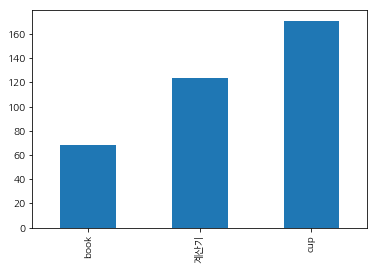

book     68
계산기     124
cup     171
dtype: int64


In [10]:
# 우리가 모델 훈련에 사용할 데이터 내용 입니다.

class_list = []
num_list = []

IMAGE_BASE_PATH = './data/VOC4IC/'
train_path = IMAGE_BASE_PATH + 'train/'
for folder in os.listdir(train_path):
    folder_size = len(os.listdir(train_path+folder))
#     print('{:<15} : {}'.format(folder,folder_size))
    class_list.append(folder)
    num_list.append(folder_size)
    
voc_s = pd.Series(num_list,index=class_list)
voc_s.sort_values().plot(kind='bar')
plt.show()

print(voc_s.sort_values())

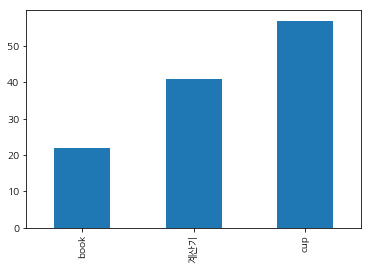

book    22
계산기     41
cup     57
dtype: int64


In [11]:
# 우리가 모델 훈련 검증에 사용할 데이터 내용 입니다.

class_list = []
num_list = []

IMAGE_BASE_PATH = './data/VOC4IC/'
valid_path = IMAGE_BASE_PATH + 'valid/'
for folder in os.listdir(valid_path):
    folder_size = len(os.listdir(valid_path+folder))
#     print('{:<15} : {}'.format(folder,folder_size))
    class_list.append(folder)
    num_list.append(folder_size)
    
voc_s = pd.Series(num_list,index=class_list)
voc_s.sort_values().plot(kind='bar')
plt.show()

print(voc_s.sort_values())

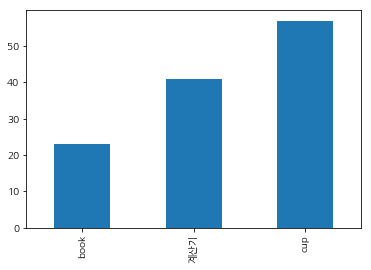

book    23
계산기     41
cup     57
dtype: int64


In [12]:
# 우리가 훈련된 모델을 검증하는데 사용할 데이터 내용 입니다.

class_list = []
num_list = []

IMAGE_BASE_PATH = './data/VOC4IC/'
test_path = IMAGE_BASE_PATH + 'test/'
for folder in os.listdir(test_path):
    folder_size = len(os.listdir(test_path+folder))
#     print('{:<15} : {}'.format(folder,folder_size))
    class_list.append(folder)
    num_list.append(folder_size)
    
voc_s = pd.Series(num_list,index=class_list)
voc_s.sort_values().plot(kind='bar')
plt.show()

print(voc_s.sort_values())

## Transfer Learning 을 통해 적은 데이터를 가지고 빠르게 학습시키기

여기서는 VOC2012에서 학습한 weight(가중치) 값을 이용하여 VOC4IC 데이터를 학습시킵니다.

In [13]:
# base model 의 input shape, 그리고  trainable 을 false 로 합니다. 

base_model = MobileNetV2(input_shape=(224,224,3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Transfer Learning 에서 정확성을 높이기 위해 마지막 3개 block 에서 모델 트레이닝합니다.

In [14]:
# transfer learning에서 마지막 3개 block 을 사용하여 모델을 트레이닝 합니다. 

set_trainable = False
for layer in tqdm(base_model.layers):
    if layer.name in ['block_14_expand','block_15_expand', 'block_16_expand']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

100%|██████████| 155/155 [00:00<00:00, 31665.15it/s]


In [15]:
# 레이어 구성을 살펴 봅니다. 

layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]

pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.In...,input_1,False
1,<tensorflow.python.keras.layers.convolutional....,Conv1_pad,False
2,<tensorflow.python.keras.layers.convolutional....,Conv1,False
3,<tensorflow.python.keras.layers.normalization....,bn_Conv1,False
4,<tensorflow.python.keras.layers.advanced_activ...,Conv1_relu,False
5,<tensorflow.python.keras.layers.convolutional....,expanded_conv_depthwise,False
6,<tensorflow.python.keras.layers.normalization....,expanded_conv_depthwise_BN,False
7,<tensorflow.python.keras.layers.advanced_activ...,expanded_conv_depthwise_relu,False
8,<tensorflow.python.keras.layers.convolutional....,expanded_conv_project,False
9,<tensorflow.python.keras.layers.normalization....,expanded_conv_project_BN,False


In [16]:
# 모델 만들기, 기존 모델의 weight 값을 사용하고 pooling 과 activation 함수를 추가 합니다. 

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512,activation='relu'),
    Dense(64,activation='relu'),
    Dense(len(CLASSES), activation='softmax')
])
model.summary()

plot_model(model,to_file='./img/model/voc2012_mobilenet_model.png',show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 2,946,883
Trainable params: 688,899
Non-trainable params: 2,257,984
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


### 모델 컴파일

In [17]:
model.compile(loss=categorical_crossentropy, 
              optimizer=Adam(learning_rate=0.0001), # transfer learning 여기서 학습률을 더 작게 
              metrics=['acc'])

### 모델 학습하기

In [18]:
# 트레인 데이터 augmentation 의로 데이터를 증가 시킴니다.  

train_datagen = ImageDataGenerator(rotation_range=30,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                   )

train_set = train_datagen.flow_from_directory(IMAGE_BASE_PATH + 'train/',
                                              target_size=(224, 224),
                                              batch_size=8,
                                              shuffle=True,
                                              class_mode='categorical')

Found 363 images belonging to 3 classes.


In [19]:
# 학습중에 validation에 사용할 데이터셋 입니다.  

valid_datagen = ImageDataGenerator(rescale=1./255)

valid_set = valid_datagen.flow_from_directory(IMAGE_BASE_PATH + 'valid/',
                                            target_size=(224, 224),
                                            batch_size=8,
                                            shuffle=True,
                                            class_mode='categorical')

Found 120 images belonging to 3 classes.


In [20]:
# 학습을 완료후에 모델 성능 테스트에 사용할 데이터셋 입니다. 

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(IMAGE_BASE_PATH + 'test/',
                                            target_size=(224, 224),
                                            batch_size=8,
                                            shuffle=True,
                                            class_mode='categorical')

Found 121 images belonging to 3 classes.


In [21]:
# 모델 트레이닝 입니다. 

history = model.fit_generator(train_set,
                              steps_per_epoch=train_set.n // train_set.batch_size,
                              epochs=30,
                              validation_data=valid_set,
                              validation_steps=valid_set.n // valid_set.batch_size,
#                               use_multiprocessing=True,
                              )

Epoch 1/30
11/45 [======>.......................] - ETA: 16s - loss: 1.0073 - acc: 0.5568

KeyboardInterrupt: 

### 모델 저장하기

In [ ]:
model.save('./bin/mobilenetv2_class20.h5')

In [ ]:
test_set.class_indices.items()

In [ ]:
# key 와 value 값을 바꾸어 줍니다. 
class20 = dict()
for key,value in test_set.class_indices.items():
    class20[value] = key

with open('./bin/class20.pickle', 'wb') as f:
    pickle.dump(class20, f)

In [ ]:
class20

### 모델 평가하기

In [ ]:
# 트레인 데이터와 테스트 데이터 셋으로 loss 와 accuracy 측정합니다.  

train_loss, train_acc = model.evaluate_generator(train_set)
print('Train Loss : {}'.format(train_loss))
print('Train Accuracy : {}'.format(train_acc))

test_loss, test_acc = model.evaluate_generator(test_set)
print('Test Loss : {}'.format(test_loss))
print('Test Accuracy : {}'.format(test_acc))

In [ ]:
# loss 측정값의 시각화 입니다.  

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# accuracy 측정값의 시각화 입니다.  

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(loss)+1)

plt.plot(epochs,acc,label='Training Accuarcy')
plt.plot(epochs,val_acc,label='Validation Accuarcy')
plt.title('Training and Validation Accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()

plt.show()

### 테스트해보기

In [ ]:
# 추론하기 위한 작업입니다. 모델 설정, 입력 데이터 전처리.

def predict_test_img(path):
    img = cv2.imread(path) 
    
    model = load_model('./bin/mobilenetv2_class20.h5')
    
    print('Original Shape : ',img.shape)
    
    img = cv2.resize(img, (224,224), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    print('Resized Shape : ',img.shape)
    plt.imshow(img)
    plt.show()
    
    ans = model.predict_classes(np.expand_dims(img,axis=0))
    with open('./bin/class20.pickle','rb') as f:
        class20 = pickle.load(f)
    print('Predict : {}'.format(class20[ans[0]]))
    
    predicted_result = model.predict(np.expand_dims(img,axis=0))

    pd.DataFrame(predicted_result,columns=class20.values()).iloc[0].plot(kind='bar')
    plt.show()

In [ ]:
# 기존에 사용되지 않았던 임의 데이터를 추론 하기

predict_test_img('img/test/dog.jpg')

In [ ]:
predict_test_img('img/test/cat.jpg')